# Visualisierung als Zeitleiste

Die Metadaten der dem Topic Model zugrundeliegenden Dokumente enthalten auch Zeitangaben. Diese Dimension ist in den bisherigen Analysen nicht ber√ºcksichtigt worden. Das zeitliche Auftreten und Verschwinden von Themen kann jedoch eine lohnende Analyseebene sein. Als Visualisierung bietet sich hierbei eine Zeitleiste an.

In [1]:
from cPickle import load
import pandas as pd

with open('../07_Topic_Modeling/topicmodel20.pickle', 'rb') as picklefile:
    ldamodel = load(picklefile)

data = pd.read_csv("../Daten/reden.csv", parse_dates=['date'], encoding='utf-8')

In [2]:
data['year'] = data['date'].apply(lambda date: date.year)

In [3]:
doc_topic = pd.DataFrame(ldamodel.doc_topic_)

In [4]:
doc_topic_by_year = doc_topic.groupby(data['year'])

In [5]:
topic_by_year = doc_topic_by_year.mean()
topic_by_year

0         1         2         3         4         5         6   \
year                                                                         
2009  0.355085  0.017363  0.062819  0.051168  0.031475  0.031570  0.014841   
2010  0.371247  0.035100  0.090093  0.051064  0.022261  0.023018  0.026893   
2011  0.375129  0.038498  0.096502  0.049026  0.033833  0.025448  0.026267   
2012  0.360847  0.033947  0.097148  0.049557  0.046563  0.019663  0.047129   
2013  0.363046  0.049507  0.081086  0.058250  0.043113  0.027970  0.038799   
2014  0.375115  0.038936  0.090859  0.033331  0.022167  0.017870  0.026100   

            7         8         9         10        11        12        13  \
year                                                                         
2009  0.129052  0.048118  0.033194  0.021098  0.020884  0.021456  0.056024   
2010  0.059728  0.020004  0.018234  0.048852  0.031181  0.024634  0.070623   
2011  0.062681  0.028368  0.035155  0.045445  0.023904  0.023252  0.054590   
2012  0.064738  0.023873  0.012072  0.040527  0.034156  0.035831  0.058361   
2013  0.049393  0.023102  0.008741  0.049752  0.057299  0.016841  0.056511   
2014  0.096448  0.040085  0.016763  0.053723  0.035600  0.031364  0.038900   

            14        15        16        17        18        19  
year                                                              
2009  0.051582  0.017113  0.011916  0.008582  0.015392  0.001270  
2010  0.031870  0.014279  0.011870  0.015108  0.013366  0.020575  
2011  0.018681  0.015096  0.010076  0.011528  0.010030  0.016489  
2012  0.017506  0.013985  0.007842  0.012301  0.006552  0.017400  
2013  0.014953  0.022991  0.011151  0.007271  0.005005  0.015220  
2014  0.010430  0.020964  0.009495  0.017183  0.013743  0.010923

In [6]:
topic_by_year.index = topic_by_year.index.astype(str)

/home/frederik/Dropbox/Dokumente/Lehrveranstaltungen/LA_Luzern/Python/pyenv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


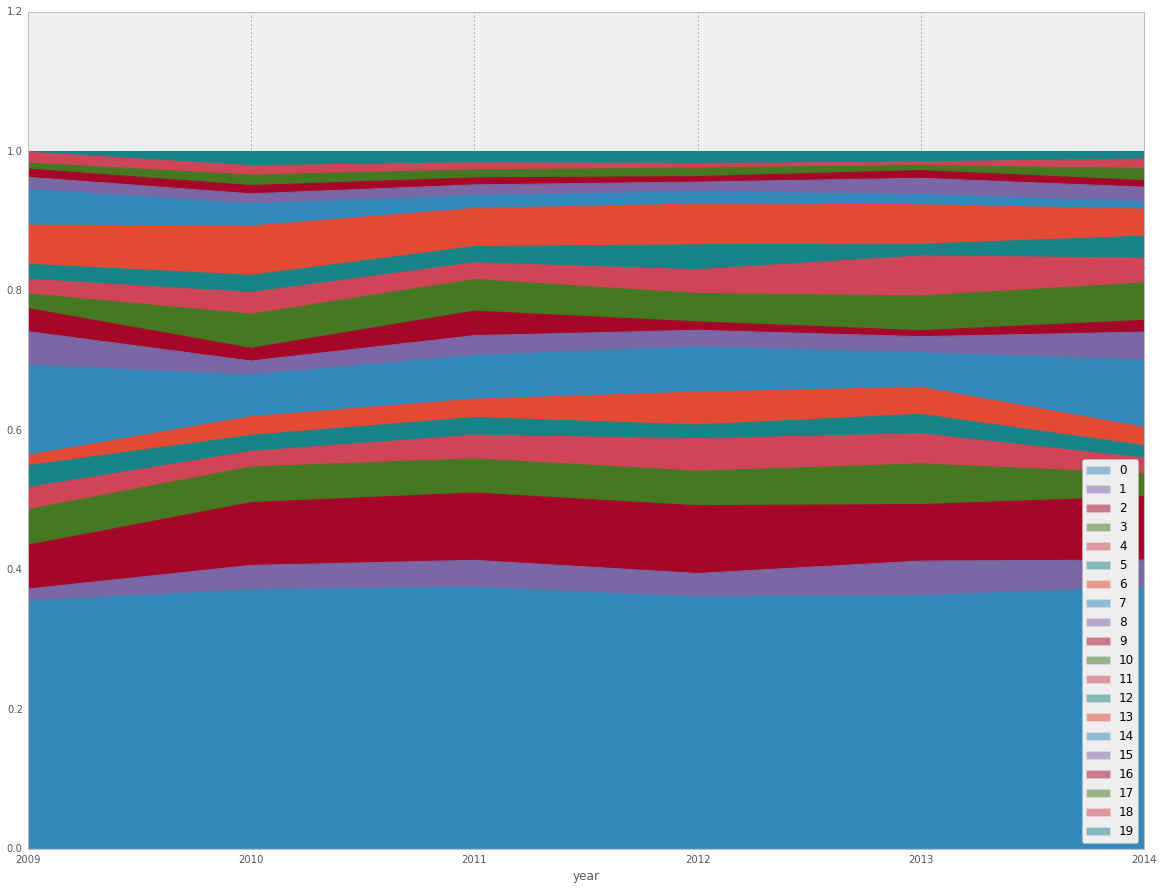

In [7]:
%matplotlib inline
pd.options.display.mpl_style = 'default'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 15

topic_by_year.plot(kind='area')